In [2]:
!pip install copernicusmarine

Defaulting to user installation because normal site-packages is not writeable
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 19.7 MB/s eta 0:00:00a 0:00:01
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import copernicusmarine 
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 

In [4]:
# Import modules

# Set parameters
data_request = {
   "dataset_id_sst_gap_l3s" : "cmems_obs-sst_atl_phy_nrt_l3s_P1D-m",
   "longitude" : [-6.17, -5.09], 
   "latitude" : [35.75, 36.29],
   "time" : ["2023-01-01", "2023-01-31"],
   "variables" : ["sea_surface_temperature"]
}

# Load xarray dataset
sst_l3s = copernicusmarine.open_dataset(
    dataset_id = data_request["dataset_id_sst_gap_l3s"],
    minimum_longitude = data_request["longitude"][0],
    maximum_longitude = data_request["longitude"][1],
    minimum_latitude = data_request["latitude"][0],
    maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    variables = data_request["variables"]
)

# Print loaded dataset information
print(sst_l3s)

INFO - 2025-05-12T15:23:03Z - Selected dataset version: "202211"
INFO - 2025-05-12T15:23:03Z - Selected dataset part: "default"
INFO - 2025-05-12T15:23:08Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  dbarreto


Copernicus Marine password:

  ········


<xarray.Dataset> Size: 382kB
Dimensions:                  (time: 31, latitude: 28, longitude: 55)
Coordinates:
  * latitude                 (latitude) float32 112B 35.75 35.77 ... 36.27 36.29
  * longitude                (longitude) float32 220B -6.17 -6.15 ... -5.09
  * time                     (time) datetime64[ns] 248B 2023-01-01 ... 2023-0...
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float64 382kB dask.array<chunksize=(31, 28, 55), meta=np.ndarray>
Attributes:
    references:   Product User Manual for L3S Odyssea Product over the North-...
    institution:  Institut Francais de Recherche pour l'Exploitation de la me...
    contact:      emmanuelle.autret@ifremer.fr;jfpiolle@ifremer.fr
    title:        ODYSSEA North-East Atlantic Sea Surface Temperature Gridded...
    source:       Odyssea L3S processor
    Conventions:  CF-1.7, ACDD-1.3, ISO 8601
    history:      file originally produced by Ifremer/Cersat with Odyssea pro...


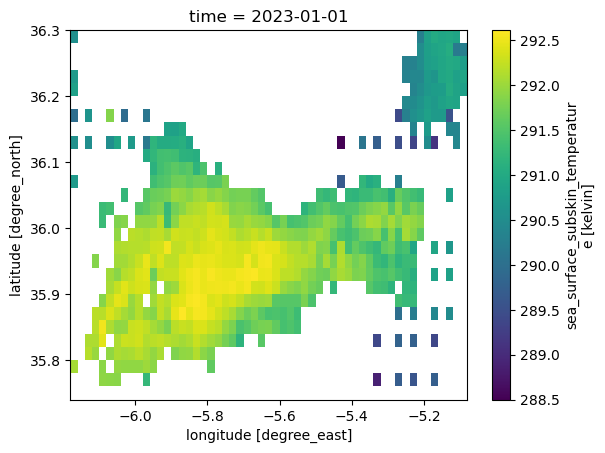

In [16]:
sst_l3s.sea_surface_temperature.isel(time=0).plot()